In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [32]:
df=pd.read_csv("C:\\Users\\mithr\\Downloads\\autism-prediction\\Autism-prediction\\train.csv")
df.head()
# Display the first few rows of the dataset

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [33]:
print(df.describe())
# Summary statistics

             ID    A1_Score   A2_Score    A3_Score   A4_Score    A5_Score  \
count  800.0000  800.000000  800.00000  800.000000  800.00000  800.000000   
mean   400.5000    0.582500    0.28625    0.321250    0.41500    0.457500   
std    231.0844    0.493455    0.45229    0.467249    0.49303    0.498502   
min      1.0000    0.000000    0.00000    0.000000    0.00000    0.000000   
25%    200.7500    0.000000    0.00000    0.000000    0.00000    0.000000   
50%    400.5000    1.000000    0.00000    0.000000    0.00000    0.000000   
75%    600.2500    1.000000    1.00000    1.000000    1.00000    1.000000   
max    800.0000    1.000000    1.00000    1.000000    1.00000    1.000000   

        A6_Score    A7_Score    A8_Score    A9_Score   A10_Score         age  \
count  800.00000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean     0.20875    0.273750    0.717500    0.316250    0.460000   28.612306   
std      0.40667    0.446161    0.450497    0.465303    0.498709  

In [34]:
# Check for missing values
print(df.isnull().sum())

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


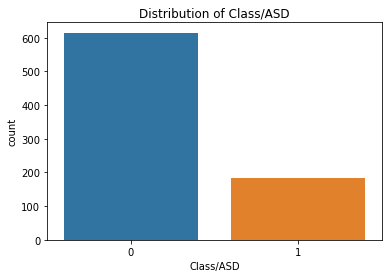

In [35]:
# Explore the distribution of the target variable ('Class/ASD')
sns.countplot(x='Class/ASD', data=df)
plt.title('Distribution of Class/ASD')
plt.show()

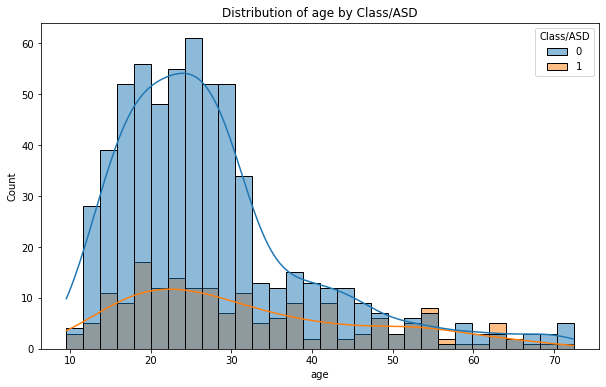

In [36]:
# Explore the distribution of numerical features by class
num_cols = ['age']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df, x=col, hue='Class/ASD', kde=True, bins=30)
    plt.title(f'Distribution of {col} by Class/ASD')
    plt.show()


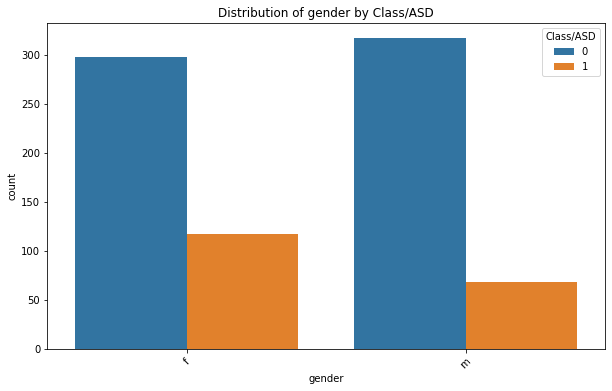

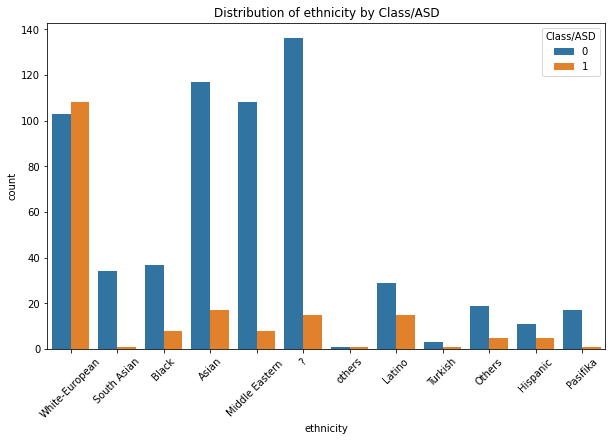

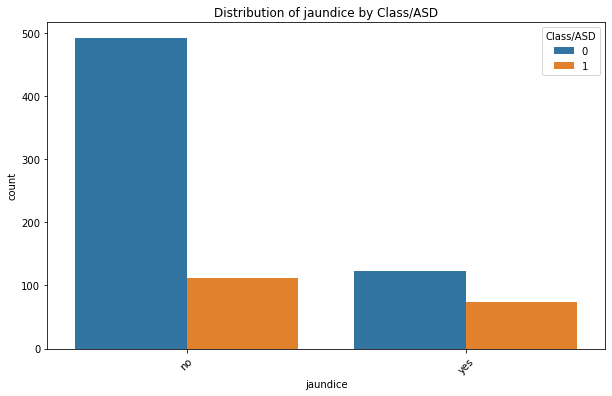

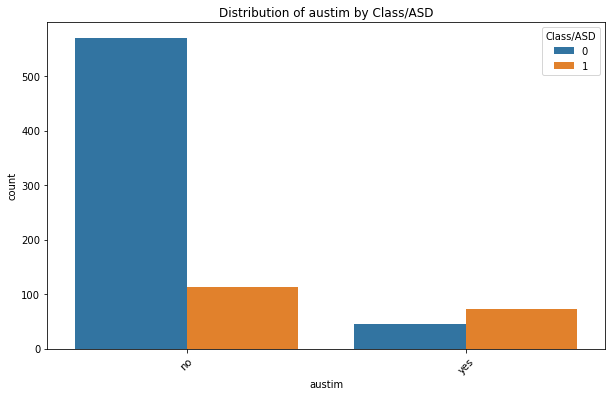

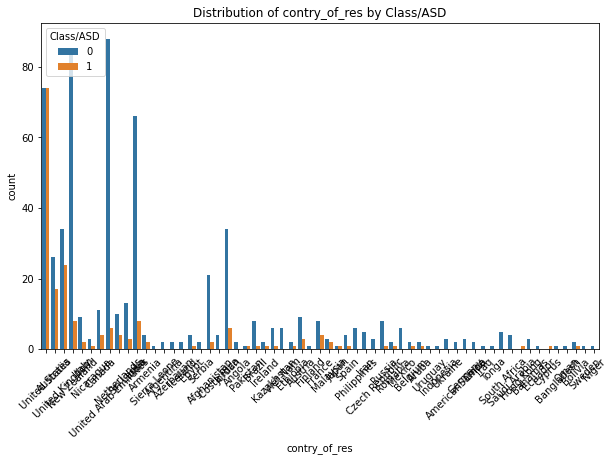

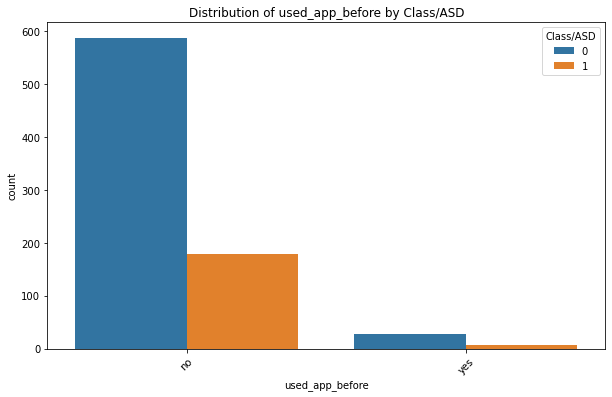

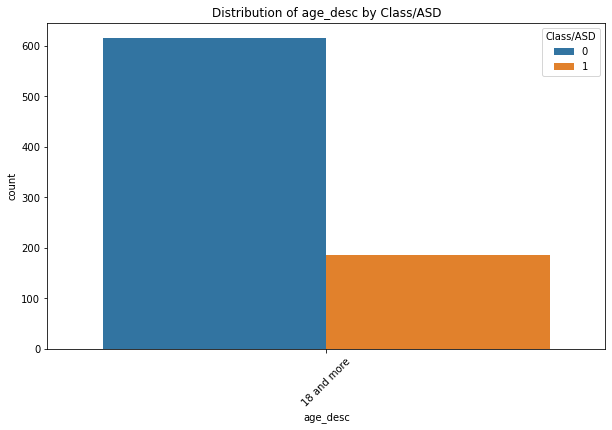

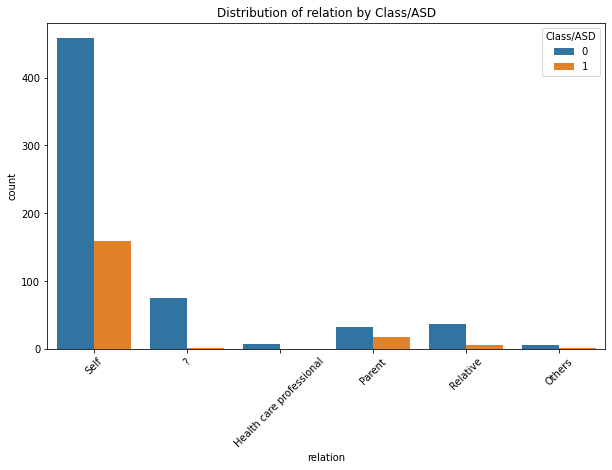

In [37]:
# Explore the distribution of categorical features
cat_cols = ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Class/ASD', data=df)
    plt.title(f'Distribution of {col} by Class/ASD')
    plt.xticks(rotation=45)
    plt.show()

In [38]:
# Assuming 'df' is your DataFrame
# Sorting
df_sorted = df.sort_values(by='age')

# Interquartile Range (IQR) Method
numerical_cols = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))

# Handle missing values
df_cleaned = df.dropna()

# Remove outliers
df_no_outliers = df[~outliers.any(axis=1)]

Mean Squared Error: 8.940327515074312


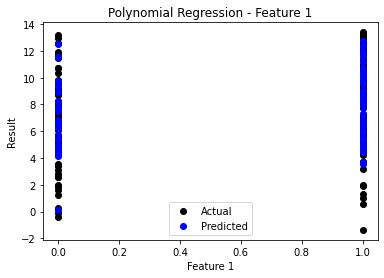

In [39]:
# Assuming you have a DataFrame 'df'
# Extracting features and target variable
X = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']]
y = df['result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Make predictions
y_pred = model.predict(X_poly_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting the results (for one feature - you can modify for others)
feature_index = 0  # Change this index to visualize different features
plt.scatter(X_test.iloc[:, feature_index], y_test, color='black', label='Actual')
plt.scatter(X_test.iloc[:, feature_index], y_pred, color='blue', label='Predicted')
plt.title(f'Polynomial Regression - Feature {feature_index + 1}')
plt.xlabel(f'Feature {feature_index + 1}')
plt.ylabel('Result')
plt.legend()
plt.show()

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'Class/ASD' is your target variable
X = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']]
y = df['Class/ASD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
# You can adjust the hyperparameters based on your specific requirements
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n', classification_rep)


Accuracy: 0.81875
Confusion Matrix:
[[102  19]
 [ 10  29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88       121
           1       0.60      0.74      0.67        39

    accuracy                           0.82       160
   macro avg       0.76      0.79      0.77       160
weighted avg       0.84      0.82      0.82       160



In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
#df = pd.read_csv('your_dataset.csv')

# Assuming 'Class/ASD' is your target variable
X = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']]
y = df['Class/ASD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n', classification_rep)


Accuracy: 0.85
Confusion Matrix:
[[108  13]
 [ 11  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       121
           1       0.68      0.72      0.70        39

    accuracy                           0.85       160
   macro avg       0.80      0.81      0.80       160
weighted avg       0.85      0.85      0.85       160



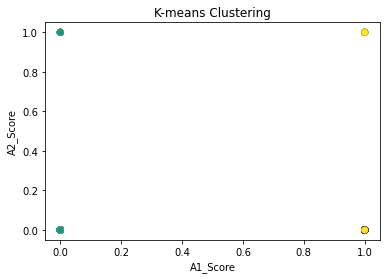

In [50]:
from sklearn.cluster import KMeans
# Assuming 'Class/ASD' is your target variable
X = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']]

# Specify the number of clusters (K)
k = 3  # Adjust the number of clusters based on your requirements

# Create and fit the KMeans model
kmeans_model = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans_model.fit_predict(X)

# Visualize the clusters (example for two features)
plt.scatter(df['A1_Score'], df['A2_Score'], c=df['cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('A1_Score')
plt.ylabel('A2_Score')
plt.show()

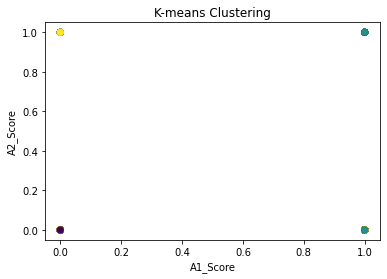

In [51]:
from sklearn.preprocessing import StandardScaler
# Selecting relevant columns for clustering
features = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Specify the number of clusters (K)
k = 3  # Adjust the number of clusters based on your requirements

# Create and fit the KMeans model
kmeans_model = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans_model.fit_predict(X_scaled)

# Visualize the clusters (example for two features)
plt.scatter(df['A1_Score'], df['A2_Score'], c=df['cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('A1_Score')
plt.ylabel('A2_Score')
plt.show()

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Assuming 'Class/ASD' is your target variable
X = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']]
y = df['Class/ASD']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the ANN model
# You can adjust the hyperparameters based on your specific requirements
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=42)
ann_model.fit(X_train, y_train)

# Make predictions
y_pred = ann_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n', classification_rep)


Accuracy: 0.8
Confusion Matrix:
[[104  17]
 [ 15  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       121
           1       0.59      0.62      0.60        39

    accuracy                           0.80       160
   macro avg       0.73      0.74      0.73       160
weighted avg       0.80      0.80      0.80       160



C:\Users\mithr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\mithr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8
Confusion Matrix:
[[104  17]
 [ 15  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       121
           1       0.59      0.62      0.60        39

    accuracy                           0.80       160
   macro avg       0.73      0.74      0.73       160
weighted avg       0.80      0.80      0.80       160



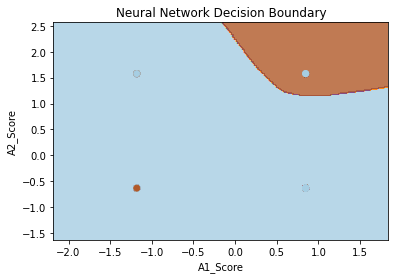

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'Class/ASD' is your target variable
X = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']]
y = df['Class/ASD']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the ANN model
# You can adjust the hyperparameters based on your specific requirements
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=42)
ann_model.fit(X_train, y_train)

# Make predictions
y_pred = ann_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n', classification_rep)

# Plot decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('A1_Score')
    plt.ylabel('A2_Score')
    plt.show()

# Assuming we have two features for simplicity (modify as needed)
X_two_features = X_scaled[:, :2]
ann_model_two_features = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=42)
ann_model_two_features.fit(X_two_features, y)

# Plot the decision boundary for two features
plot_decision_boundary(X_two_features, y, ann_model_two_features, 'Neural Network Decision Boundary')





Epoch 1/50


20/20 [==============================] - 1s 14ms/step - loss: 0.4607 - accuracy: 0.8391 - val_loss: 0.3767 - val_accuracy: 0.8500
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2899 - accuracy: 0.8922 - val_loss: 0.3624 - val_accuracy: 0.8438
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2725 - accuracy: 0.8953 - val_loss: 0.3712 - val_accuracy: 0.8500
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2651 - accuracy: 0.8906 - val_loss: 0.3714 - val_accuracy: 0.8375
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2597 - accuracy: 0.8969 - val_loss: 0.3738 - val_accuracy: 0.8375
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2540 - accuracy: 0.8938 - val_loss: 0.3792 - val_accuracy: 0.8438
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2531 - accuracy: 0.8938 - val_loss: 0.3805 - val_accuracy: 0.8438
Epoch 8/50
20/

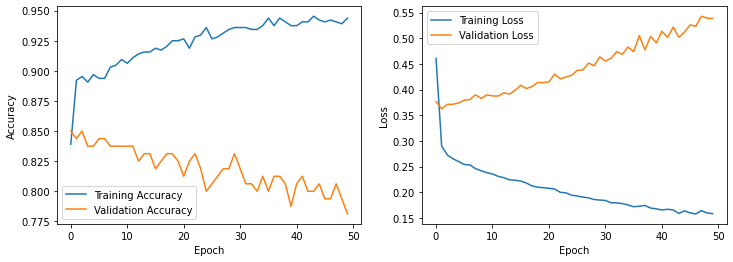

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Assuming 'Class/ASD' is your target variable
X = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']]
y = df['Class/ASD']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n', classification_rep)

# Plot training history (accuracy and loss over epochs)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
